isi:

-visualisasi data menggunakan seaborn dan matpotlib

-membuat line chart, pie chart, dan subplot

-membuat pairplot dan countplot dg seaborn

-membuat korelasi heatmap

-membuat distribusi plot

-membuat histogram dan scatter plot

a) scatter plot : menunjukan hubungan antara dua variabel

b) bubble chart : menunjukan hubungan antara tiga variabel

c) bar chart : menunjukan perbandingan antara beberapa variabel

d) line chart : membandingkan median data dan rata-rata beberapa variabel

e) histogram : menunjukn distribusi data

f) box plot : menunjukan distribusi data dengan lebih banyak informasi

g) pie chart : menunjukan komposisi/presentasi data dalam lingkaran

h) stacked bar chart :  menunjukan komposisi/presentasi data dalam bar

i) stacked area chart : menunjukan komposisi/presentasi data dalam area 2D

In [ ]:
#import library matpotlib, panda, seaborn
#agar hasil visualisasi bisa langsung tercetak di Jupyter Notebook
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline

In [ ]:
#kalau biasanya panda membaca file format csv, sekarang data akan membuat df atau mendefinisikan menjadi Pandas Dataframe dg semua alokasi crypto dlm portofolio
#membuat data dgn total sum 100% = 20+55+5+17+3
crypto_df = pd.DataFrame(data = { 'allocation %' : [20, 55, 5, 17, 3]}, index = ['BTC', 'ETH', 'LTC', 'XRP', 'ADA'])
crypto_df

,allocation %
BTC,20
ETH,55
LTC,5
XRP,17
ADA,3


Text(0.5, 1.0, 'CRYPTO PORTOFOLIO PIE CHART')

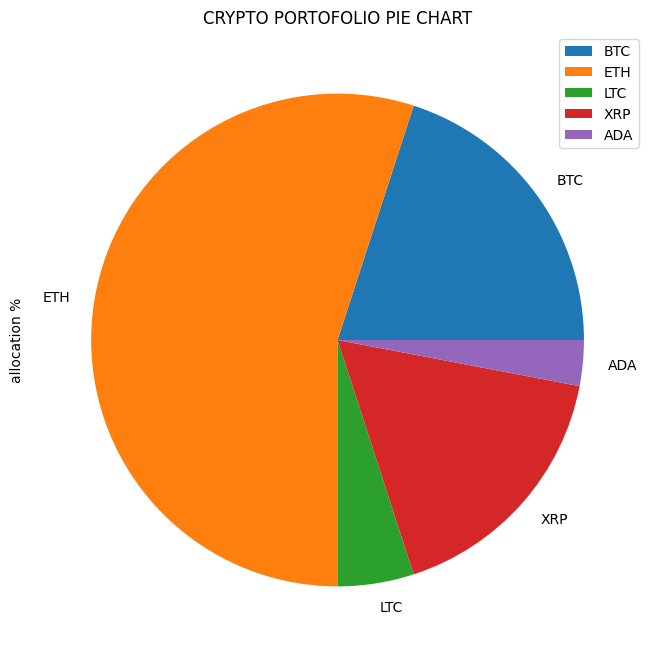

In [ ]:
#matpotlib untuk plot piechart
crypto_df.plot.pie(y = 'allocation %', figsize = (8,8)) #sumbu y alokasi
plt.title("CRYPTO PORTOFOLIO PIE CHART")

In [ ]:
#LATIHAN 1
#membagi 60% : XRP, dan sisanya dibagi rata: BTC, LTC, ADA, ETH
crypto_df = pd.DataFrame(data = { 'allocation %' : [10, 10, 10, 60, 10]}, index = ['BTC', 'ETH', 'LTC', 'XRP', 'ADA'])
crypto_df

,allocation %
BTC,10
ETH,10
LTC,10
XRP,60
ADA,10


Text(0.5, 1.0, 'NEW CRYPTO PORTOFOLIO PIE CHART')

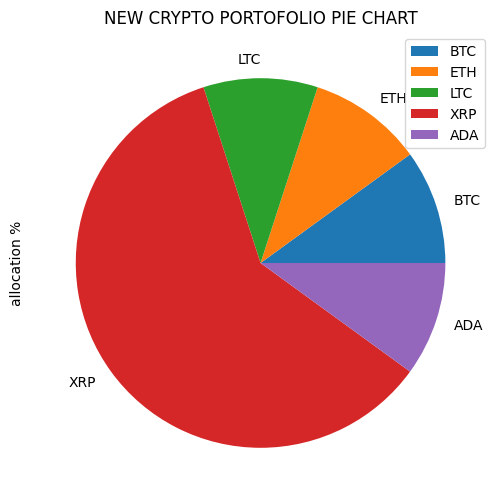

In [ ]:
crypto_df.plot.pie(y = 'allocation %', figsize = (6,6))
plt.title("NEW CRYPTO PORTOFOLIO PIE CHART")

Text(0.5, 1.0, 'NEW CRYPTO PORTOFOLIO PIE CHART')

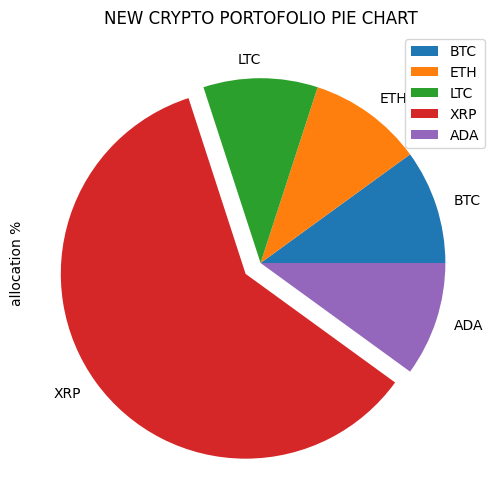

In [ ]:
#MENNGUNAKAN ATRIBUT 'EXPLODE'
#untuk membuat pemisahan bagian XRP dgn lainnya
crypto_df = pd.DataFrame(data = { 'allocation %' : [10, 10, 10, 60, 10]}, index = ['BTC', 'ETH', 'LTC', 'XRP', 'ADA'])
crypto_df
crypto_df.plot.pie(y = 'allocation %', figsize = (6,6), explode = [0, 0, 0, 0.1, 0]) #nilai XRP dibuat 0.1 supaya hanya XRP yang terpisah bagiannya di pie chart
plt.title("NEW CRYPTO PORTOFOLIO PIE CHART")

In [ ]:
#LATIHAN 2
#plot single dan multiple line
investments_df = pd.read_csv('crypto_daily_prices.csv')
investments_df

,Date,BTC,ETH,ADA
0,9/17/2014,457.334015,NaN,NaN
1,9/18/2014,424.440002,NaN,NaN
2,9/19/2014,394.795990,NaN,NaN
3,9/20/2014,408.903992,NaN,NaN
4,9/21/2014,398.821014,NaN,NaN
...,...,...,...,...
2828,6/15/2022,22572.839840,1233.206421,0.533296
2829,6/16/2022,20381.650390,1067.730713,0.475022
2830,6/17/2022,20471.482420,1086.519287,0.487392
2831,6/18/2022,19017.642580,993.636780,0.456182


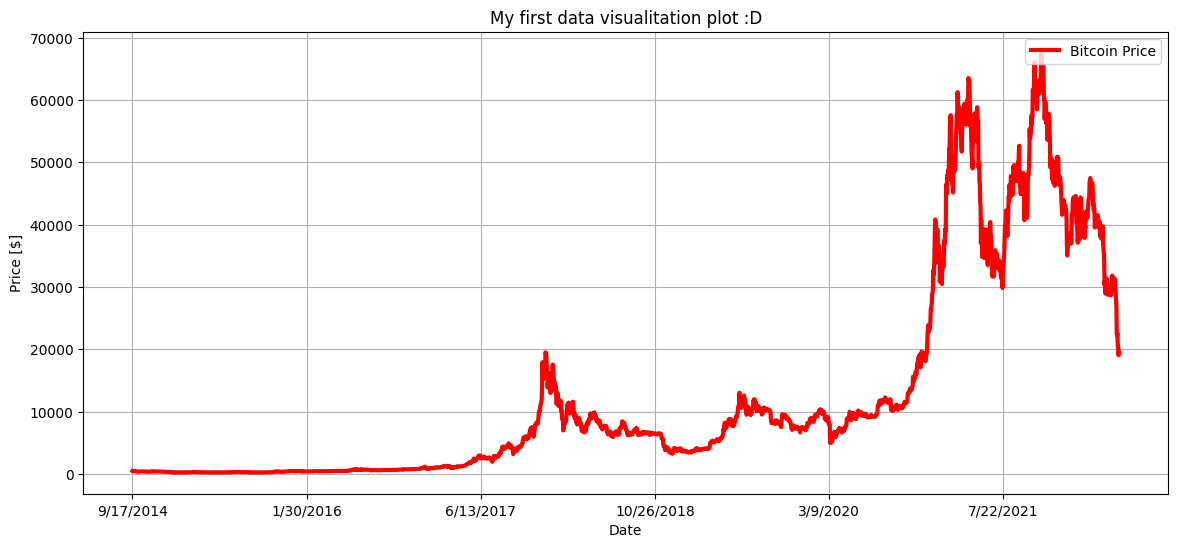

In [ ]:
#plot single line BTC saja pada kolom y nya
investments_df.plot(x = 'Date', y = 'BTC', label = 'Bitcoin Price', color = 'r', linewidth = 3, figsize = (14,6));
plt.ylabel('Price [$]')
plt.title('My first data visualitation plot :D')
plt.legend(loc = 'upper right') #lokasi ket/legenda di kanan atas
plt.grid() #diberi grid

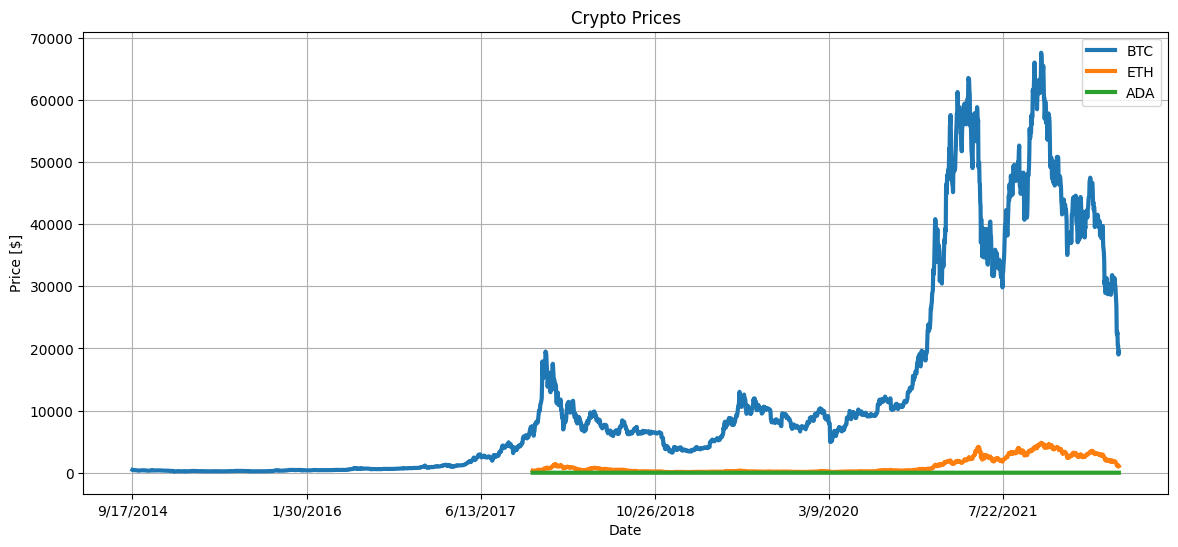

In [ ]:
#plot multiple line dengan menggunakan 3 data sekaligus pada kolom y nya
investments_df.plot(x = 'Date', y = ['BTC', 'ETH', 'ADA'], linewidth = 3, figsize = (14,6));
plt.ylabel('Price [$]')
plt.title('Crypto Prices')
plt.legend(loc = 'upper right') #lokasi ket/legenda di kanan atas
plt.grid() #diberi grid

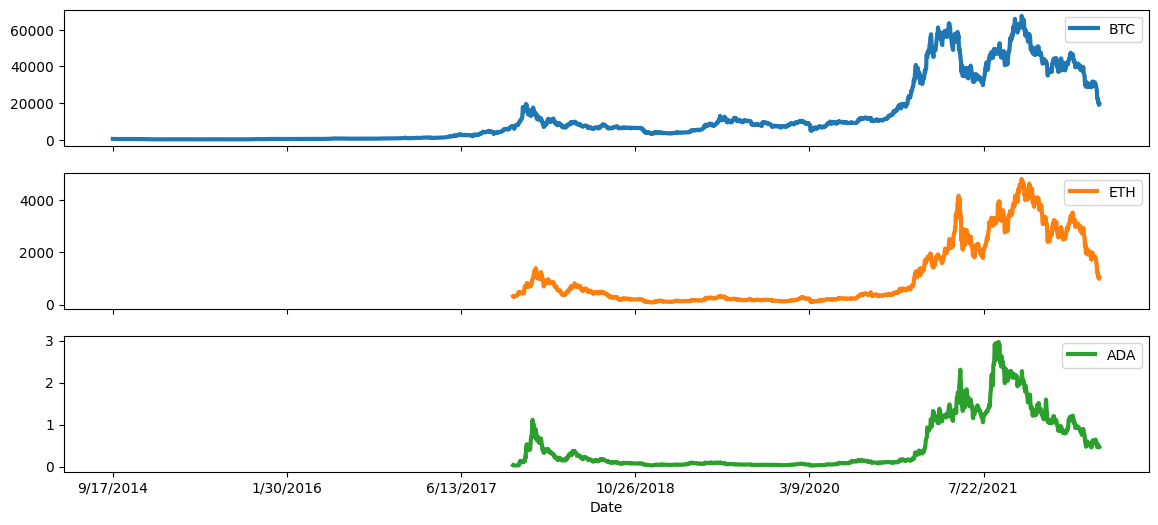

In [ ]:
#terdapat perbedaan skala yang membuat data ADA menjadi tidak tergambar jelas, jadi untuk kasus ini daripada menggunakan multiple line plot lebih baik
#dilakukan subplot sebagai solusinya
#tambahkan atribut subplots = True
investments_df.plot(x = 'Date', y = ['BTC', 'ETH', 'ADA'], linewidth = 3, subplots = True, figsize = (14,6));

In [ ]:
#LATIHAN 3
#membuat scatter plot
daily_return_df = pd.read_csv('crypto_daily_returns.csv')
daily_return_df

,Date,BTC,ETH,ADA
0,9/17/2014,0.000000,0.000000,0.000000
1,9/18/2014,-7.192558,NaN,NaN
2,9/19/2014,-6.984264,NaN,NaN
3,9/20/2014,3.573492,NaN,NaN
4,9/21/2014,-2.465854,NaN,NaN
...,...,...,...,...
2828,6/15/2022,1.648355,1.778018,10.097317
2829,6/16/2022,-9.707194,-13.418330,-10.927140
2830,6/17/2022,0.440750,1.759673,2.604094
2831,6/18/2022,-7.101781,-8.548629,-6.403471


<Axes: xlabel='BTC', ylabel='ETH'>

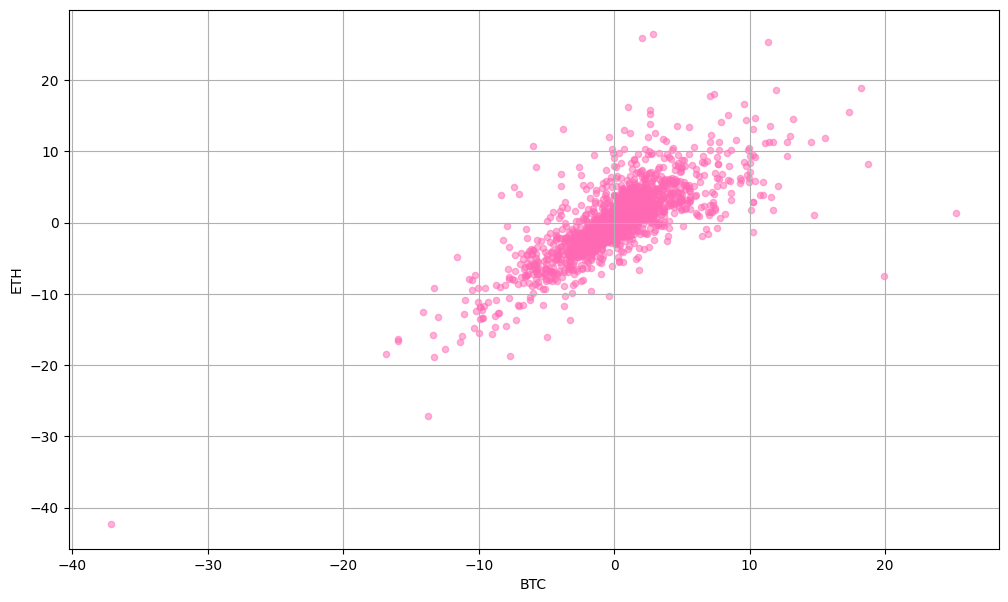

In [ ]:
#plot harian BTC Vs ETH
daily_return_df.plot.scatter('BTC', 'ETH', grid = True, figsize = (12,7), color = 'hotpink', alpha = 0.5) #alpha = transparansi/saturasi titik

<Axes: xlabel='BTC', ylabel='ADA'>

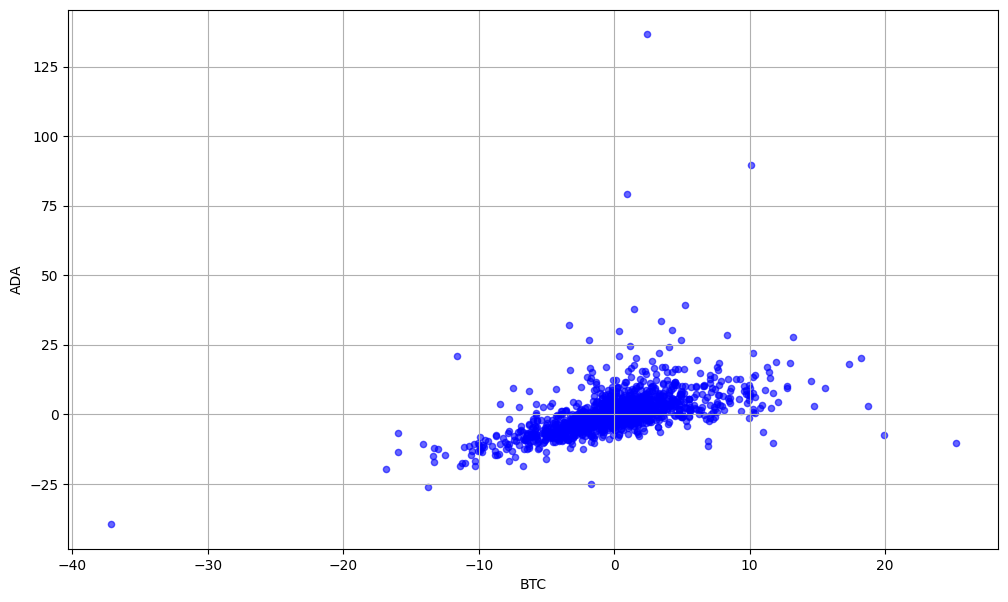

In [ ]:
#LATIHAN 3
#plot harian BTC Vs ADA
daily_return_df.plot.scatter('BTC', 'ADA', grid = True, figsize = (12,7), color = 'blue', alpha = 0.6)

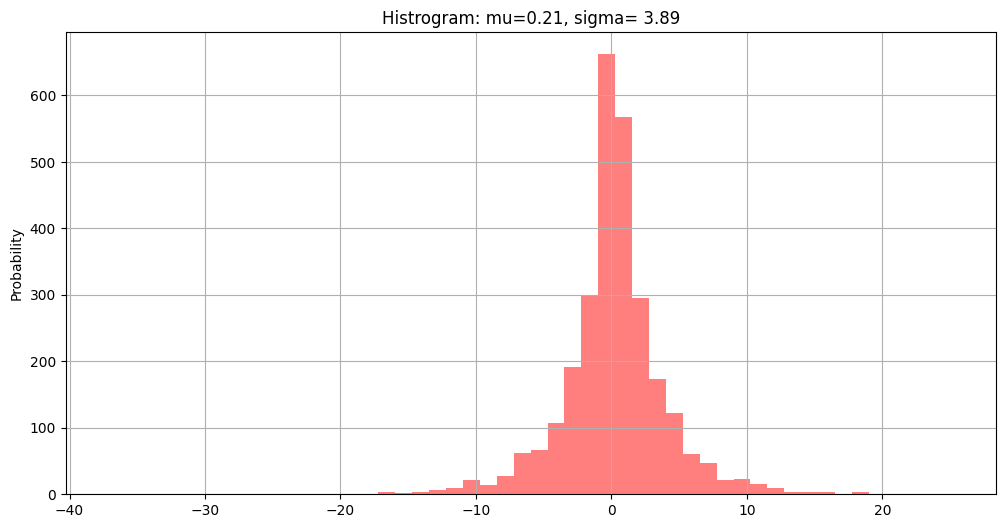

In [ ]:
#LATIHAN 4
#plot histogram
mu = round(daily_return_df['BTC'].mean(), 2) #angka 2 adalah round atau pembulatan untuk hanya dua angka dibelakang koma
sigma = round(daily_return_df['BTC'].std(), 2) #std = standar deviasi distrbusi
num_bins = 50 #semakin besar nomor bins maka hist makin detail

plt.figure(figsize = (20, 15))
daily_return_df['BTC'].plot.hist(bins = num_bins, color = 'r', alpha = 0.5, figsize = (12, 6))

plt.grid()
plt.ylabel('Probability')
plt.title('Histrogram: mu=' +str(mu)+ ', sigma= ' +str(sigma)); #str itu string

<Figure size 2000x1500 with 0 Axes>

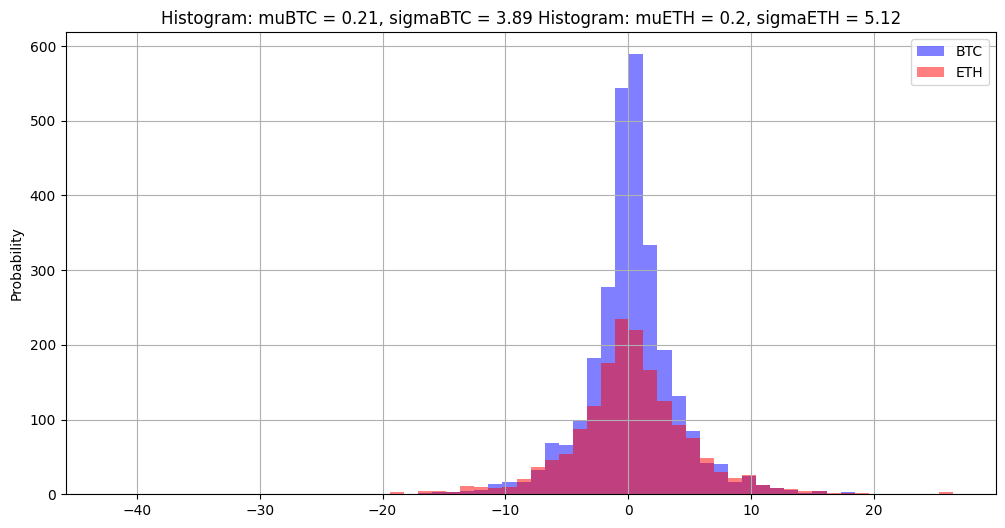

In [ ]:
#membuat plot hist dua data, yaitu BTC dan ETH dg bin 60
#BTC
mu_BTC = round(daily_return_df['BTC'].mean(), 2)
sigma_BTC = round(daily_return_df['BTC'].std(), 2)

#ETH
mu_ETH  = round(daily_return_df['ETH'].mean(), 2)
sigma_ETH = round(daily_return_df['ETH'].std(), 2)
num_bins= 60

plt.figure(figsize=(20,15))
daily_return_df[['BTC', 'ETH']].plot.hist(bins= num_bins, color = ['b', 'r'], alpha = 0.5, figsize=(12,6))
plt.grid()
plt.ylabel('Probability')
plt.title('Histogram: muBTC = ' + str(mu_BTC) + ', sigmaBTC = ' + str(sigma_BTC) + ' ' + 'Histogram: muETH = ' + str(mu_ETH) + ', sigmaETH = ' + str(sigma_ETH));

In [ ]:
#LATIHAN 5
#scatterplot dan countplot
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [ ]:
cancer_df = pd.read_csv('cancer.csv')
cancer_df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [ ]:
cancer_df.tail()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0
568,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,0.1587,0.05884,...,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039,1


In [ ]:
#mencaritahu jumlah baris
len(cancer_df)

569

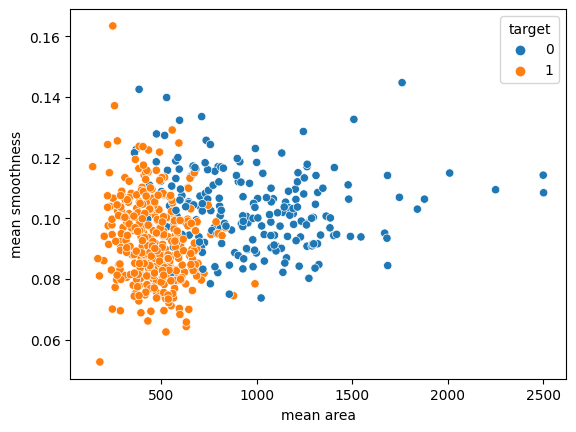

In [ ]:
#membuat scatter plot
sns.scatterplot(x = 'mean area', y = 'mean smoothness', hue = 'target', data = cancer_df);
#hue= color code/warna pembeda berdasarkan nilai target
#nilai target 0=no sedangkan 1=yes, nantinya ini bisa diubah di tableau untuk aliasnya sehingga lebih jelas
#misal target 0=Tidak Ada, dan 1=Ada

<Axes: xlabel='target', ylabel='count'>

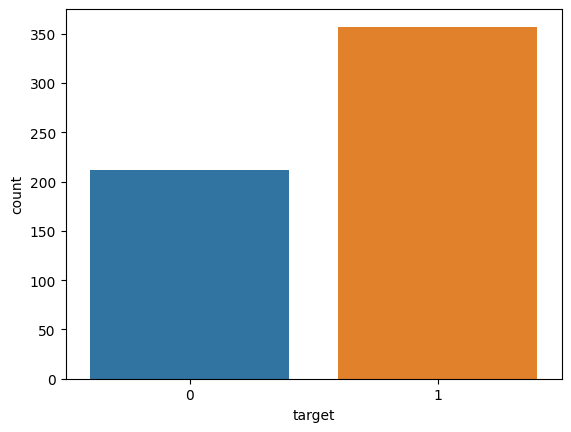

In [ ]:
#membuat countplot
sns.countplot(x = cancer_df['target'])
#jadi untuk countplot hanya menghitung terget 0 jumlahnya brapa dan target 1 totalnya dalam bntuk bar

<Axes: xlabel='mean radius', ylabel='mean area'>

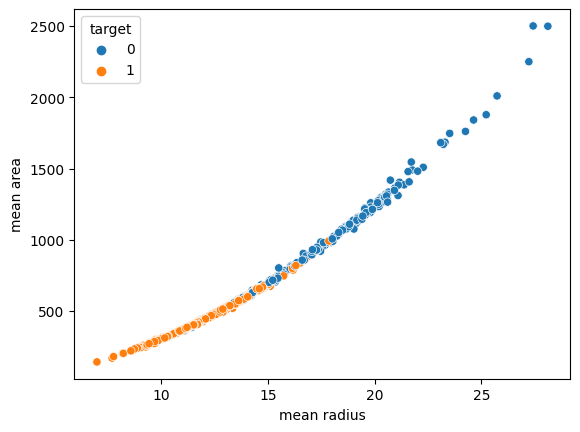

In [ ]:
#LATIHAN 6
#scatterplot antara mean radius dan mean area
sns.scatterplot(x = 'mean radius', y = 'mean area', hue = 'target', data = cancer_df)

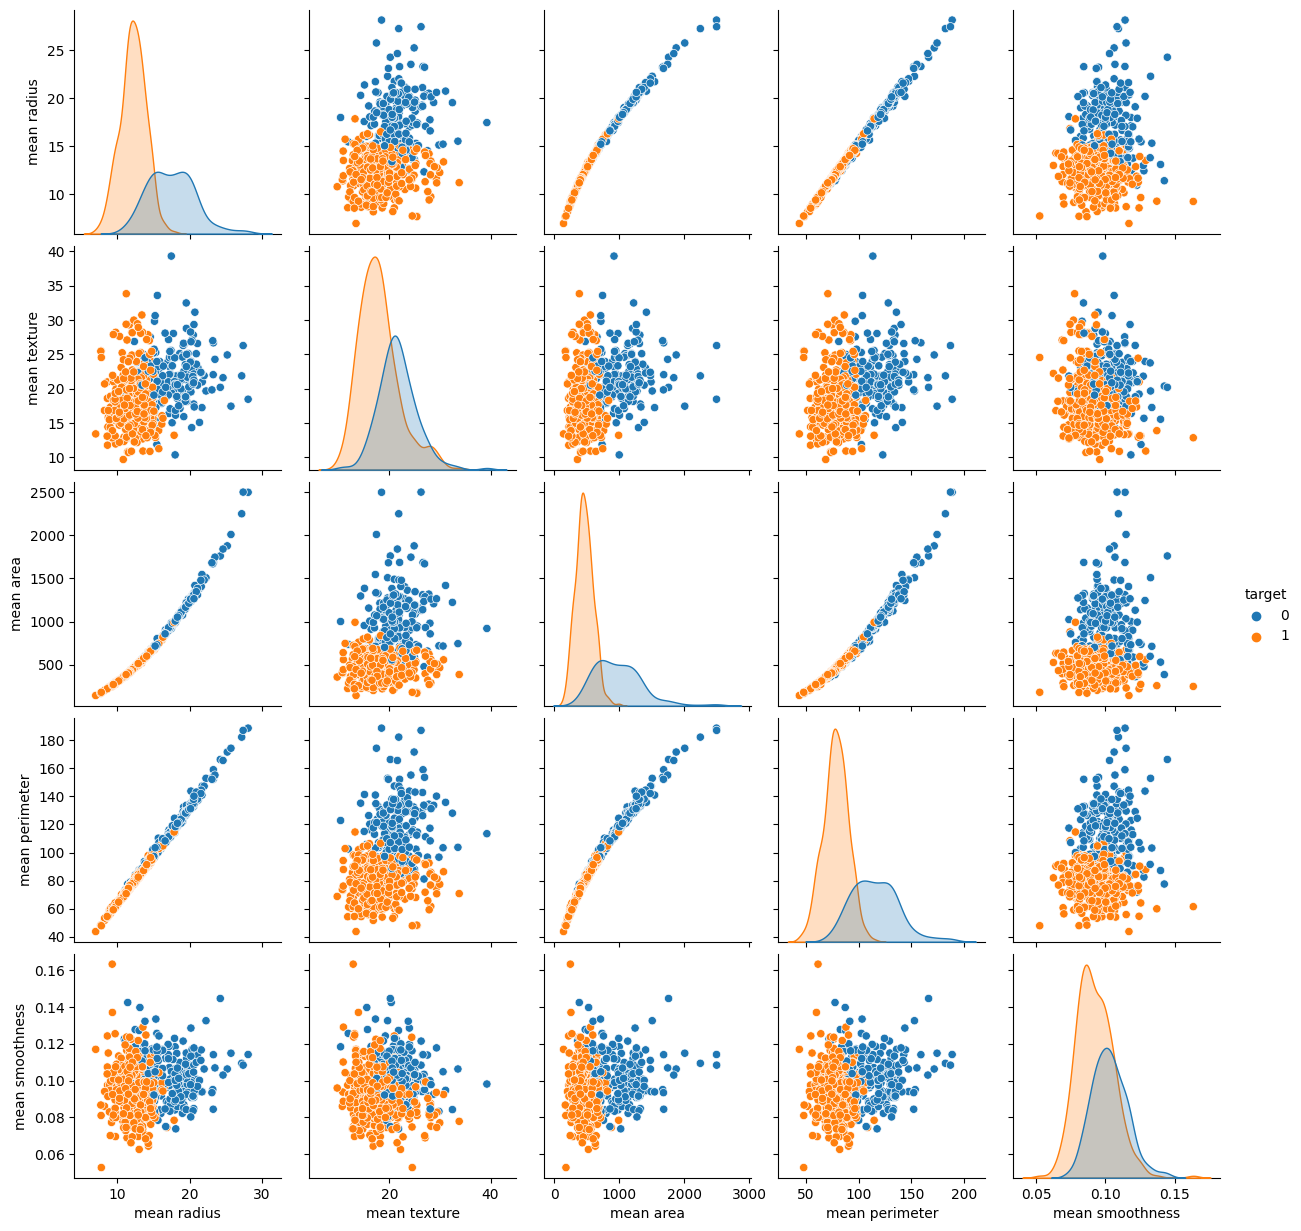

In [ ]:
#Dapat dilihat berdasarkan data bahwa target yang bernilai 1 atau yang terdapat cancer memiliki nilai mean radius 0-18 dan mean area pada 0-1000. Sedangkan pada target 0 atau tidak ada cancer nilai mean area dan mean radius besar yakni pada 15-30 dan 1000-2500.

#LATIHAN 6
#plot pairplot
#visualisasi yang menunjukan berbagai informasi dalam satu plot, dengan memasukan df, parameter hue, dan variabel yang akan ditunjukan
#jadi hasil yang diplot ialah perbandingan masing-masing variabel satu sama lain
sns.pairplot(cancer_df, hue = 'target', vars = ['mean radius', 'mean texture', 'mean area', 'mean perimeter', 'mean smoothness'])

<Axes: >

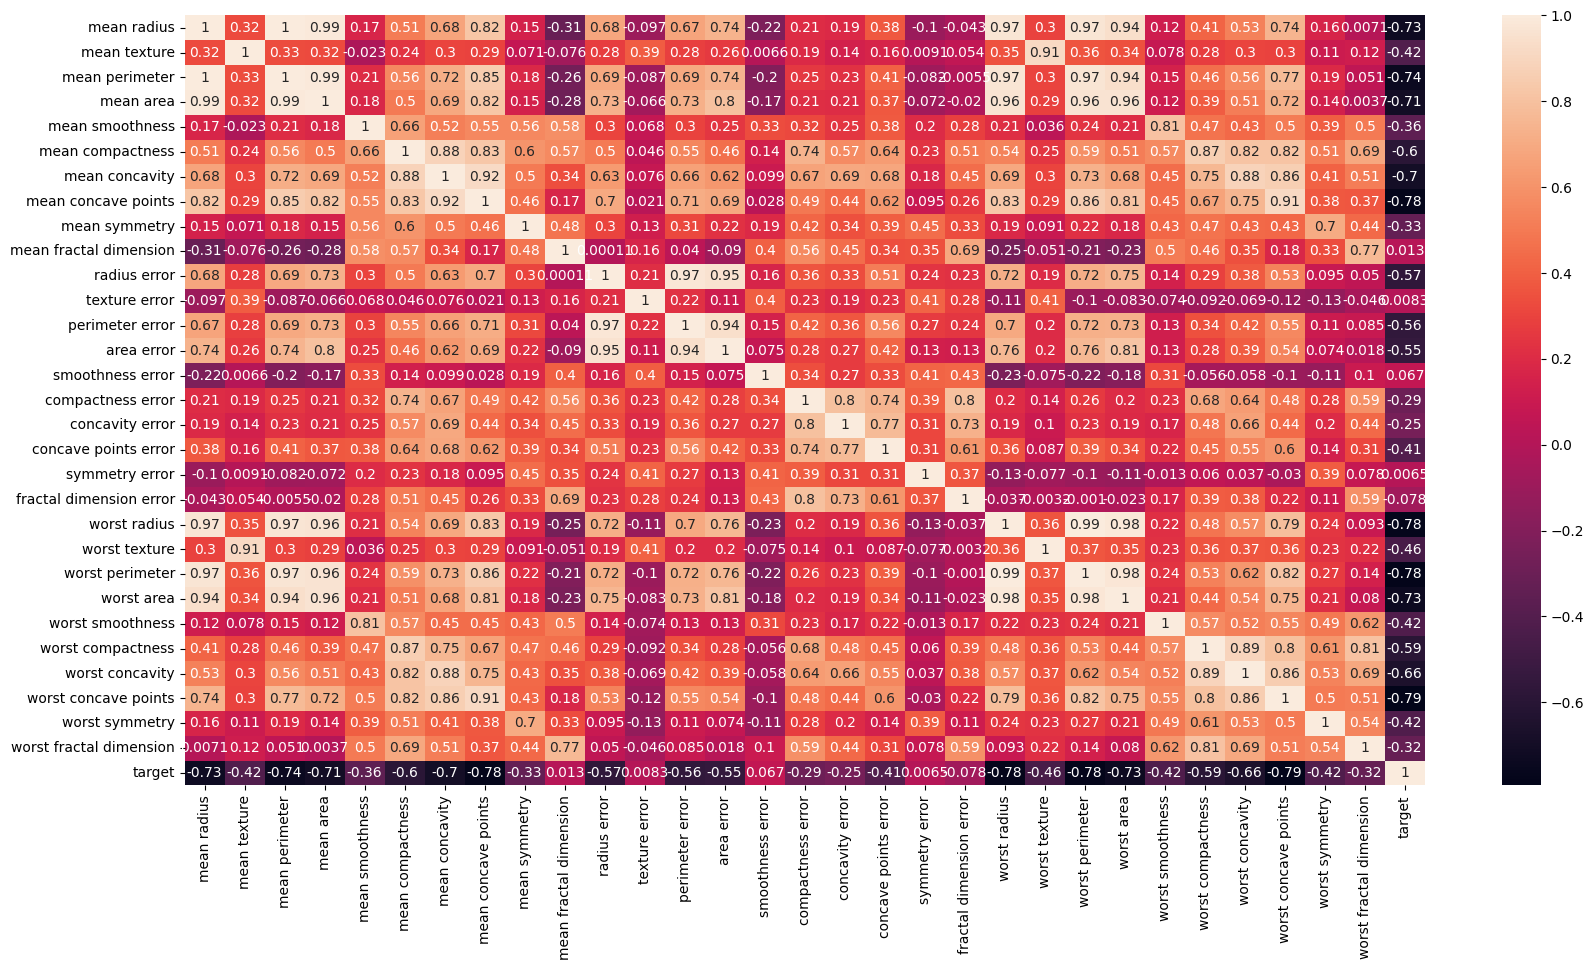

In [ ]:
#korelasi antara mean radius dan mean perimeter (1), serta mean area dengan mean perimeter (0.99)
plt.figure(figsize = (20, 10))
sns.heatmap(cancer_df.corr(), annot = True)

<ipython-input-136-b98f5a094a1b>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x = cancer_df['mean radius'], bins = 15, color = 'hotpink') #bins mengacu kedetailan histnya


<Axes: ylabel='Density'>

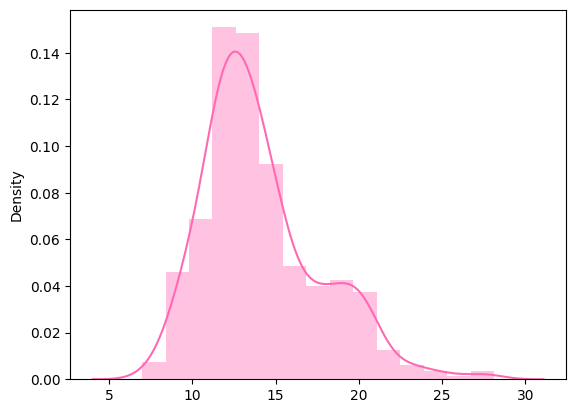

In [ ]:
#distplot (distribusi plot)
#menggabungkan fungsi histogram matpotlib dgn kdeplot (karnel density estimation)
#KDEplot digunakan untuk plot kepadatan probabilitas dari var kontinyu
sns.distplot(x = cancer_df['mean radius'], bins = 15, color = 'hotpink') #bins mengacu kedetailan histnya

In [ ]:
#garis menunjukan KDE dan bins histogram

#membuat displot dengan kelas target terpisah
target0_df = cancer_df[cancer_df['target'] == 0]
target1_df = cancer_df[cancer_df['target'] == 1]

<ipython-input-138-55baccb610f3>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x = target0_df['mean radius'], bins = 15, color = 'b')
<ipython-input-138-55baccb610f3>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x = target1_df['mean radius'], bins = 15, color = 'r')


<Axes: ylabel='Density'>

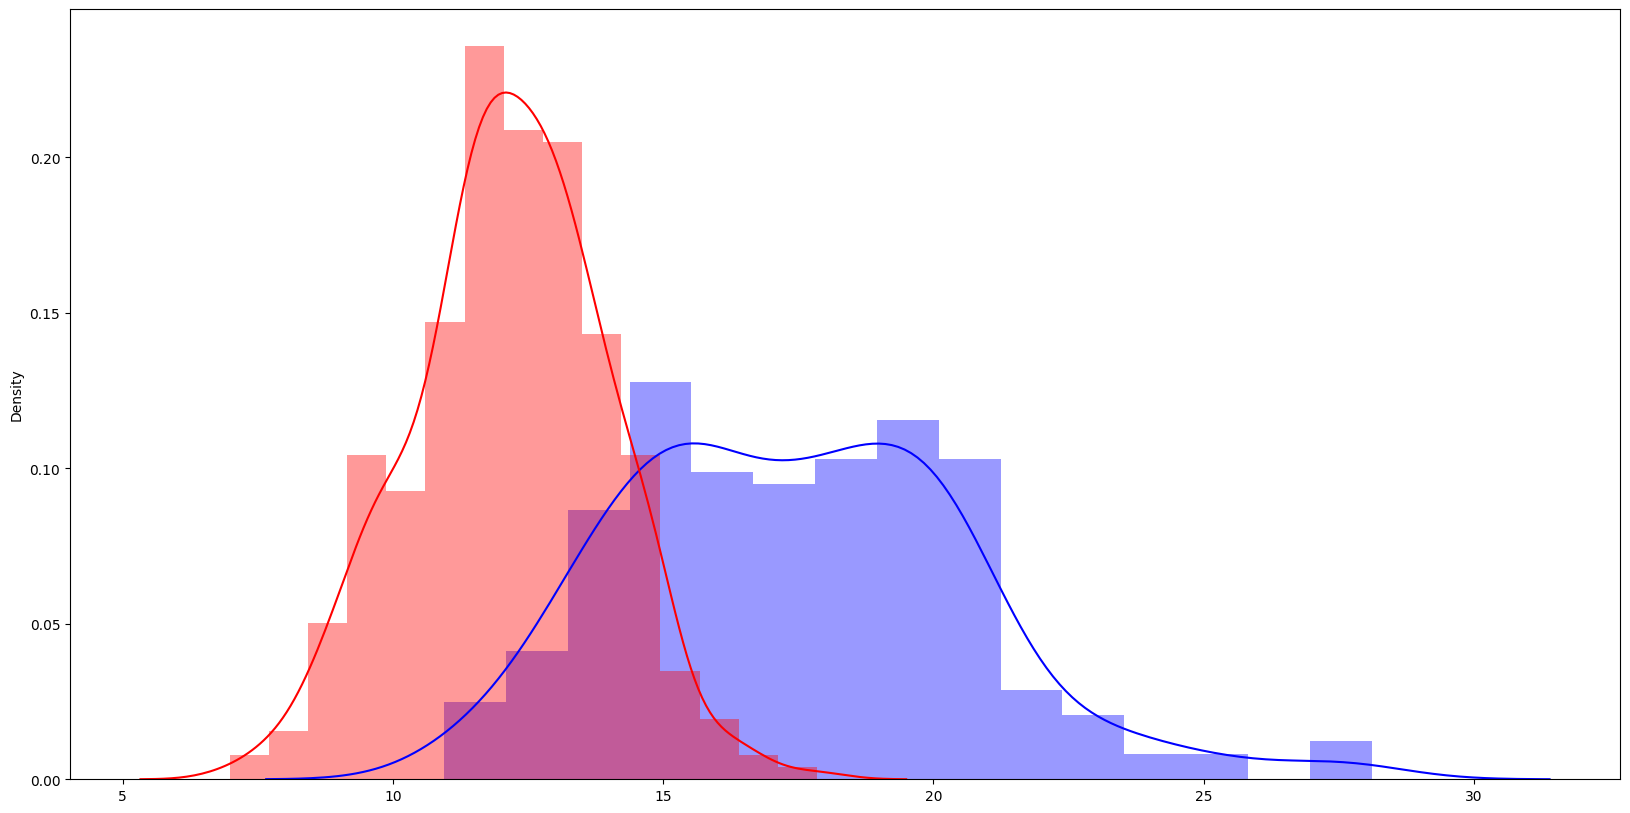

In [ ]:
plt.figure(figsize = (20, 10))
sns.distplot(x = target0_df['mean radius'], bins = 15, color = 'b')
sns.distplot(x = target1_df['mean radius'], bins = 15, color = 'r')